# BM 336546- Machine Learning in Health care - HW2: Type 1 Diabetes
Sagi Ben Izthak - 307885152

Shir Ricon - 204632780

# PART I: Data Exploration
# Q1:


In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import random

random.seed(10)
file = Path.cwd().joinpath('HW2_data.csv')
T1D_dataset = pd.read_csv(file)

Preprocessing:

In [2]:
from HW2_functions import rm_nan_pat as rm
T1D_df_str = rm(T1D_dataset)
col_names = T1D_df_str.columns
T1D_df = pd.get_dummies(T1D_df_str, drop_first=True)
cols = T1D_df.columns.tolist()
cols = cols[0:1] + cols[2:17] + cols[1:2] + cols[-1:]
T1D_df = T1D_df[cols]
T1D_df.columns = ['Age', 'Gender', 'Increased Urination', 'Increased Thirst',
       'Sudden Weight Loss', 'Weakness', 'Increased Hunger', 'Genital Thrush',
       'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing',
       'Partial Paresis', 'Muscle Stiffness', 'Hair Loss', 'Obesity',
       'Family History', 'Diagnosis']


T1D_feats = T1D_df.copy()
del T1D_feats['Diagnosis']
Diagnosis = T1D_df[['Diagnosis']]

The preprocessing includes:
- Removal of all the patients with more then one missing data parameter from the dataset. For patients with only one missing parameter, this parameter was randomly filled with a value (yes/no) according to its prevalence among the other patients.
- Converting all 2 value features (yes/no, male/female) and labels (negative/positive) to one hot vectors (1,0 values) . 

# Q2
Train test split:

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(T1D_feats,np.ravel(Diagnosis), test_size=0.2, random_state=0, stratify=np.ravel(Diagnosis))

# Q3
# Visualization of the Data

First lets show the distribution of the features and compare them with respect to the diagnosis. We will do that by comparing the percent of positive feature (defined by 'Male for gender, '1' for Family Hisotry, and 'Yes' for the rest) between the train set and the test set for all binary features. In addition we will compare the percent of the Positive diagnosis between the train set and the train set to verify that the stratification we excuted worked:

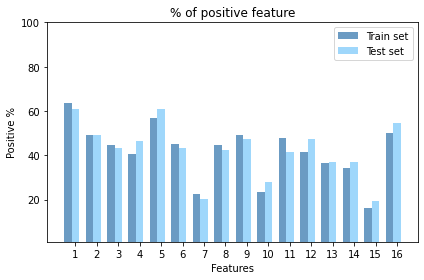

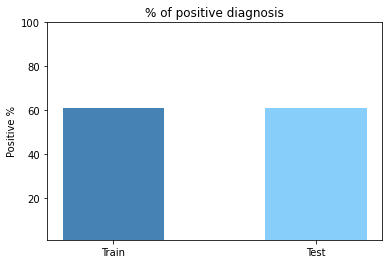

In [4]:
from HW2_functions import col_charts as c_ch
feat_remove = ['Age']
c_ch(X_train,X_test,feat_remove, y_train,y_test)

We can conclude that for all 16 features the distribution of the features is similar between the train set and the test set. For the Diagnosis, as expected, we can see that the distriburion is identical due the stratification we performed.

a.i  :
If a feature has a correlation with the label (diagnosis), an imbalance of a feature between the train and test sets might jeopardize the model and influence (weaken) the results.

a.ii  : 
We can exchange patients between the train and the test sets before implementing the model and without influencing the stratification of the diagnosis.

Now we would like to examine the relationship between the features and the lable(Diagnosis). We will do that by showing the distribution of the diagnosis for both the positive feature population(right pair of bar plots) and negative feature population (left pair of bar plots) for all the binary features:

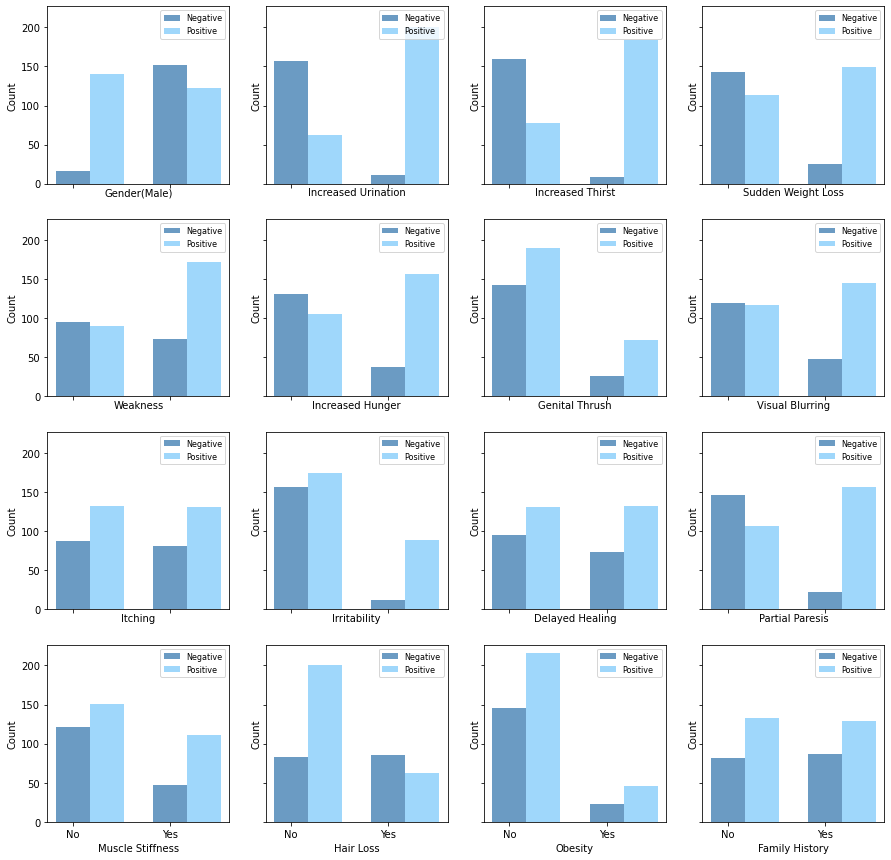

In [5]:
from HW2_functions import feat_lable as ft_lb
remove_feat = 'Age'
ft_lb(X_train,remove_feat, y_train)

d.ii : To find the most important features to our model we want to find the most discriminative features in our data. These features can be identified by looking at the features-label bar plots above. The most discriminative features are the ones were the ratio between positive and negative label(Diagnosis) change drastically between the positive feature population ("yes" bars on the right side of the plot) and the negative feature population ("no" bars on the left side of the plot). By looking at the bar plots it seems that the most important features (but not exclusive) are Increased Urination and Increased Thirst.

# Q4
Excuted at the preprocesing stage.

# Q5
Now we will choose, build and optimize different machine learning models on the dataset we prepared.

We will start with 2 Linear models:

# Linear model - Logistic Regression

In [6]:
from HW2_functions import cv_kfold
from sklearn.preprocessing import MinMaxScaler
X_train_notscl = X_train.copy()
X_test_notscl = X_test.copy()
scaler = MinMaxScaler()
X_train[['Age']] = scaler.fit_transform(X_train[['Age']])
X_test[['Age']] = scaler.transform(X_test[['Age']])

C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
K = 5 
val_dict = cv_kfold(X_train, y_train, C=C, penalty=['l1', 'l2'], K=K)
for idx, elem in enumerate(val_dict):
       print("For C=%.3f and penalty=%s the AUC is: %.3f" % (val_dict[idx].get('C'), val_dict[idx].get('penalty'), val_dict[idx].get('AUC')))

C:\Users\sagim\anaconda3\envs\bm-336546-hw2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sagim\anaconda3\envs\bm-336546-hw2\lib\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\sagim\anaconda3\envs\bm-336546-hw2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

For C=0.010 and penalty=l1 the AUC is: 0.500
For C=0.010 and penalty=l2 the AUC is: 0.956
For C=0.500 and penalty=l1 the AUC is: 0.971
For C=0.500 and penalty=l2 the AUC is: 0.971
For C=1.000 and penalty=l1 the AUC is: 0.970
For C=1.000 and penalty=l2 the AUC is: 0.971
For C=1.500 and penalty=l1 the AUC is: 0.970
For C=1.500 and penalty=l2 the AUC is: 0.971
For C=2.000 and penalty=l1 the AUC is: 0.970
For C=2.000 and penalty=l2 the AUC is: 0.971
For C=3.000 and penalty=l1 the AUC is: 0.969
For C=3.000 and penalty=l2 the AUC is: 0.970
For C=4.000 and penalty=l1 the AUC is: 0.969
For C=4.000 and penalty=l2 the AUC is: 0.970
For C=5.000 and penalty=l1 the AUC is: 0.969
For C=5.000 and penalty=l2 the AUC is: 0.970
For C=10.000 and penalty=l1 the AUC is: 0.969
For C=10.000 and penalty=l2 the AUC is: 0.970
For C=20.000 and penalty=l1 the AUC is: 0.968
For C=20.000 and penalty=l2 the AUC is: 0.969
For C=50.000 and penalty=l1 the AUC is: 0.968
For C=50.000 and penalty=l2 the AUC is: 0.968
For 

We will set our parameters by choosing the pair (of C and penalty) that gives us the best AUC score.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

C = 1 
penalty = 'l2' 
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty=penalty, C=C, max_iter=10000)
logreg.fit(X_train, y_train)

y_pred_train_LR = logreg.predict(X_train)
y_pred_proba_train_LR = logreg.predict_proba(X_train)
AUC_train_LR = roc_auc_score(y_train, y_pred_proba_train_LR[:,1])
loss_train_LR = log_loss(y_train, y_pred_train_LR)

y_pred_test_LR = logreg.predict(X_test)
y_pred_proba_test_LR = logreg.predict_proba(X_test)
AUC_test_LR = roc_auc_score(y_test, y_pred_proba_test_LR[:,1])
loss_test_LR = log_loss(y_test, y_pred_test_LR)

# Training set:

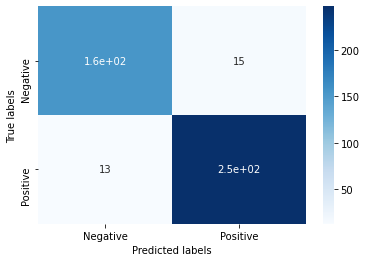

LR evaluation metrics for the training set:
AUC is: 0.981
The loss is: 2.249
F1 score is: 93.18%
Accuracy is: 93.49%


In [8]:
from sklearn import metrics
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_LR, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('LR evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_LR))
print('The loss is: %.3f' % (loss_train_LR))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_LR, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_LR))) + "%")

# Test set:

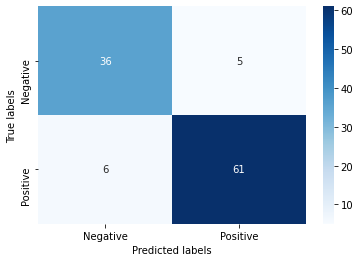

LR evaluation metrics for the test set:
AUC is: 0.957
The loss is: 3.518
F1 score is: 89.24%
Accuracy is: 89.81%


In [9]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_LR, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('LR evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_LR))
print('The loss is: %.3f' % (loss_test_LR))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_LR, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_LR))) + "%")

# Linear model - SVM

In [10]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hinge_loss
svc = SVC(probability=True)
pipe = Pipeline(steps=[('svm', svc)])
C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(X_train, y_train)
best_svm_lin = svm_lin.best_estimator_
print(svm_lin.best_params_)

y_pred_train_svm_lin = best_svm_lin.predict(X_train)
y_pred_proba_train_svm_lin = best_svm_lin.predict_proba(X_train)
AUC_train_svm_lin = roc_auc_score(y_train, y_pred_proba_train_svm_lin[:,1])
loss_train_svm_lin = hinge_loss(y_train, y_pred_train_svm_lin)

y_pred_test_svm_lin = best_svm_lin.predict(X_test)
y_pred_proba_test_svm_lin = best_svm_lin.predict_proba(X_test)
AUC_test_svm_lin = roc_auc_score(y_test, y_pred_proba_test_svm_lin[:,1])
loss_test_svm_lin = hinge_loss(y_test, y_pred_test_svm_lin)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.869, test=0.895) f1: (train=0.887, test=0.911) precision: (train=0.936, test=0.958) recall: (train=0.842, test=0.868) roc_auc: (train=0.965, test=0.951) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.866, test=0.930) f1: (train=0.882, test=0.941) precision: (train=0.950, test=0.980) recall: (train=0.823, test=0.906) roc_auc: (train=0.957, test=0.969) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.869, test=0.872) f1: (train=0.887, test=0.884) precision: (train=0.937, test=0.977) recall: (train=0.843, test=0.808) roc_auc: (train=0.962, test=0.970) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.872, test=0.837) f1: (train=0.886, test=0.865) precision: (train=0.972, test=0.865) recall: (train=0.814, test=0.865) roc_auc: (train=0.962, test=0.946) total time

# Training set:

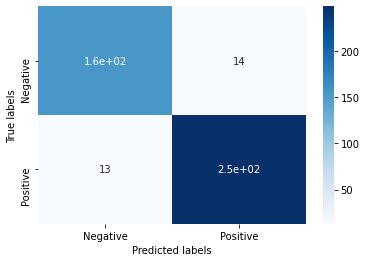

Linear SVM evaluation metrics for the training set:
AUC is: 0.976
The loss is: 0.453
F1 score is: 93.41%
Accuracy is: 93.72%


In [11]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_svm_lin, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Linear SVM evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_svm_lin))
print('The loss is: %.3f' % (loss_train_svm_lin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_svm_lin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_svm_lin))) + "%")

# Test set:

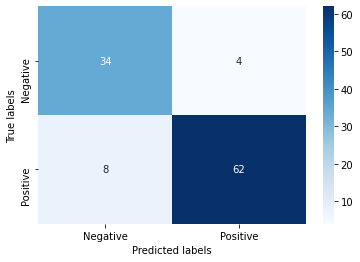

Linear SVM evaluation metrics for the test set:
AUC is: 0.959
The loss is: 0.500
F1 score is: 88.09%
Accuracy is: 88.89%


In [12]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_svm_lin, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Linear SVM evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_svm_lin))
print('The loss is: %.3f' % (loss_test_svm_lin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_svm_lin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_svm_lin))) + "%")

# Non-linear model - SVM

In [13]:
C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
svm_nonlin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(X_train, y_train)
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

y_pred_train_svm_nonlin = best_svm_nonlin.predict(X_train)
y_pred_proba_train_svm_nonlin = best_svm_nonlin.predict_proba(X_train)
AUC_train_svm_nonlin = roc_auc_score(y_train, y_pred_proba_train_svm_nonlin[:,1])
loss_train_svm_nonlin = hinge_loss(y_train, y_pred_train_svm_nonlin)

y_pred_test_svm_nonlin = best_svm_nonlin.predict(X_test)
y_pred_proba_test_svm_nonlin = best_svm_nonlin.predict_proba(X_test)
AUC_test_svm_nonlin = roc_auc_score(y_test, y_pred_proba_test_svm_nonlin[:,1])
loss_test_svm_nonlin = hinge_loss(y_test, y_pred_test_svm_nonlin)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV 1/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.616) f1: (train=0.756, test=0.763) precision: (train=0.608, test=0.616) recall: (train=1.000, test=1.000) roc_auc: (train=0.964, test=0.951) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.616) f1: (train=0.756, test=0.763) precision: (train=0.608, test=0.616) recall: (train=1.000, test=1.000) roc_auc: (train=0.958, test=0.973) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.610, test=0.605) f1: (train=0.758, test=0.754) precision: (train=0.610, test=0.605) recall: (train=1.000, test=1.000) roc_auc: (train=0.963, test=0.971) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.610, test=0.605) f1: (train=0.758, test=0.754)

# Training set:

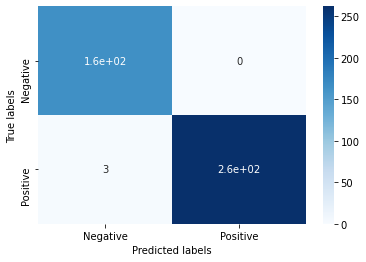

Non-linear SVM evaluation metrics for the training set:
AUC is: 1.000
The loss is: 0.398
F1 score is: 99.26%
Accuracy is: 99.30%


In [14]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_svm_nonlin, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Non-linear SVM evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_svm_nonlin))
print('The loss is: %.3f' % (loss_train_svm_nonlin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_svm_nonlin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_svm_nonlin))) + "%")

# Test set:

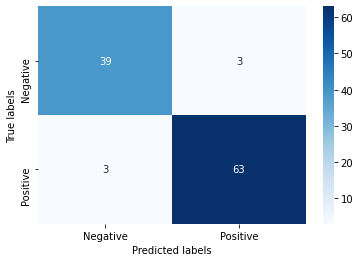

Non-linear SVM evaluation metrics for the test set:
AUC is: 0.991
The loss is: 0.444
F1 score is: 94.16%
Accuracy is: 94.44%


In [15]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_svm_nonlin, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Non-linear SVM evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_svm_nonlin))
print('The loss is: %.3f' % (loss_test_svm_nonlin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_svm_nonlin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_svm_nonlin))) + "%")

c : By comparing the 4 evaluation metrics calculated for each model it is clear that the Non-linear SVM model we applied performed significantly better in comparecment to the linear models on our datset.

# Q6
# Feature Selection
# Non-linear model - Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier as rfc
clf = rfc(n_estimators=10)
clf.fit(X_train, y_train)

y_pred_train_rfc = clf.predict(X_train)
y_pred_proba_train_rfc = clf.predict_proba(X_train)
AUC_train_rfc = roc_auc_score(y_train, y_pred_proba_train_rfc[:,1])
loss_train_rfc = hinge_loss(y_train, y_pred_train_rfc)

y_pred_test_rfc = clf.predict(X_test)
y_pred_proba_test_rfc = clf.predict_proba(X_test)
AUC_test_rfc = roc_auc_score(y_test, y_pred_proba_test_rfc[:,1])
loss_test_rfc = hinge_loss(y_test, y_pred_test_rfc)

# Training set:

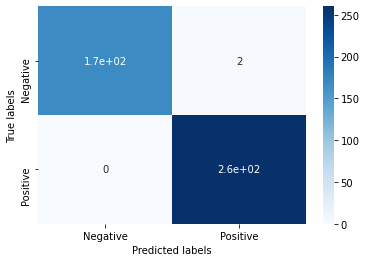

Random Forest evaluation metrics for the training set:
AUC is: 1.000
The loss is: 0.395
F1 score is: 99.51%
Accuracy is: 99.53%


In [17]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_rfc, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Random Forest evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_rfc))
print('The loss is: %.3f' % (loss_train_rfc))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_rfc, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_rfc))) + "%")

# Test set:

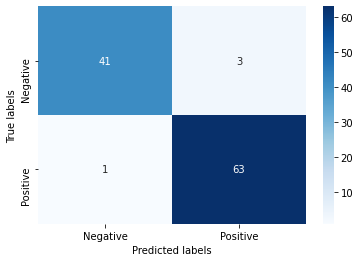

Random Forest evaluation metrics for the test set:
AUC is: 0.997
The loss is: 0.426
F1 score is: 96.14%
Accuracy is: 96.30%


In [18]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_rfc, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Random Forest evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_rfc))
print('The loss is: %.3f' % (loss_test_rfc))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_rfc, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_rfc))) + "%")

Next, in order to simpify our model, we would like to check which features hold the most importance in our model. To do so we will use the feature_impotance_ attribute of our random forest classifier:

In [19]:
feature_importance = clf.feature_importances_
print(feature_importance)

[0.09611703 0.0870533  0.23954694 0.1427697  0.06564185 0.01945087
 0.0574861  0.03471145 0.02228703 0.02522356 0.04190068 0.03163948
 0.04014819 0.023364   0.04435859 0.01902788 0.00927335]


a.i : We can see that the values of the third and forth elements are significantly higher compared to the rest. From this outcome we can conclude that the 2 most important features in our model are: 'Increased Urination' and 'Increased Thirst'.

a.ii : This conclusion matches perfectly the conclusion we had earlier in our feature exploration.

# Q7
# Data Separability Visualization

Next, We will perform dimensionality reduction on the dataset to 2D using PCA in order to visualize our results in a 2D plot:

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from HW2_functions import plt_2d_pca
n_components = 2
pca = PCA(n_components=n_components, whiten=True)
scaler = StandardScaler()
X_train_stdscl = scaler.fit_transform(X_train_notscl)
X_test_stdscl = scaler.transform(X_test_notscl)
X_train_pca = pca.fit_transform(X_train_stdscl)
X_test_pca = pca.transform(X_test_stdscl)

Training set:

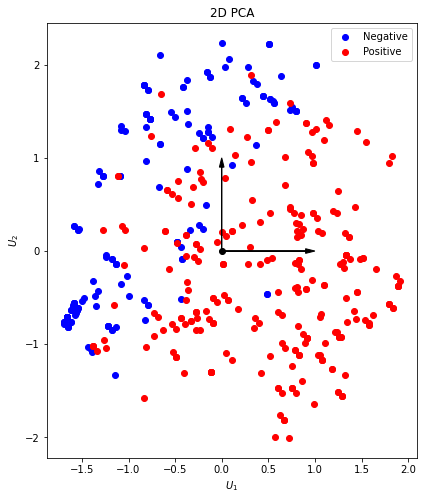

In [21]:
plt_2d_pca(X_train_pca[:,0:2],y_train)

Test set:

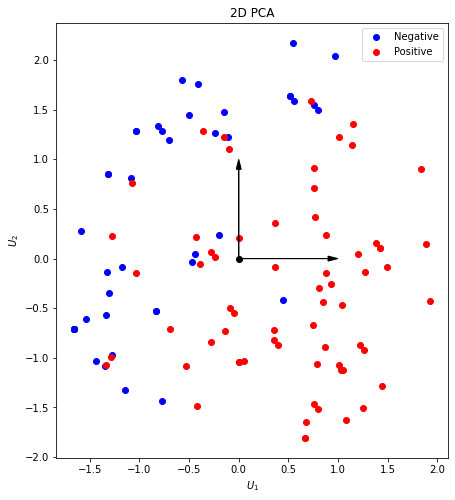

In [22]:
plt_2d_pca(X_test_pca[:,0:2],y_test)

b : By looking at the 2D plots of our new features its seems that linear spearation of the data will give us a decent result, but even the optmial linear speration will be far from perfect.

Now, wew will train the 3 models we used earlier (LR,SVM linear, SVM non-linear) on our PCA dimensionality-reduced features:
# Linear model - Logistic Regression with PCA:

In [23]:
C = 1
penalty = 'l2'
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty=penalty, C=C, max_iter=10000)
logreg.fit(X_train_pca, y_train)

y_pred_train_pca_LR = logreg.predict(X_train_pca)
y_pred_proba_train_pca_LR = logreg.predict_proba(X_train_pca)
AUC_train_pca_LR = roc_auc_score(y_train, y_pred_proba_train_pca_LR[:,1])
loss_train_pca_LR = log_loss(y_train, y_pred_train_pca_LR)

y_pred_test_pca_LR = logreg.predict(X_test_pca)
y_pred_proba_test_pca_LR = logreg.predict_proba(X_test_pca)
AUC_test_pca_LR = roc_auc_score(y_test, y_pred_proba_test_pca_LR[:,1])
loss_test_pca_LR = log_loss(y_test, y_pred_test_pca_LR)

# Training set:

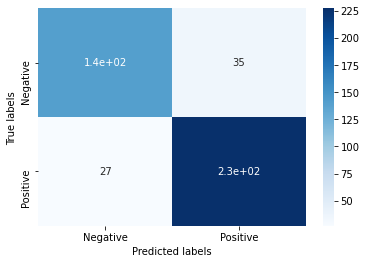

LR with PCA evaluation metrics for the training set:
AUC is: 0.939
The loss is: 4.980
F1 score is: 84.98%
Accuracy is: 85.58%


In [24]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_pca_LR, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('LR with PCA evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_pca_LR))
print('The loss is: %.3f' % (loss_train_pca_LR))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_pca_LR, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_pca_LR))) + "%")

# Test set:

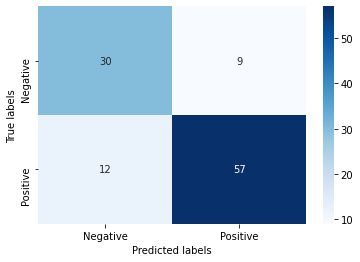

LR with PCA evaluation metrics for the test set:
AUC is: 0.917
The loss is: 6.716
F1 score is: 79.26%
Accuracy is: 80.56%


In [25]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_pca_LR, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('LR with PCA evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_pca_LR))
print('The loss is: %.3f' % (loss_test_pca_LR))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_pca_LR, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_pca_LR))) + "%")

# Linear model - SVM with PCA:

In [26]:
C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(X_train_pca, y_train)
best_svm_lin = svm_lin.best_estimator_
print(svm_lin.best_params_)

y_pred_train_pca_svm_lin = best_svm_lin.predict(X_train_pca)
y_pred_proba_train_pca_svm_lin = best_svm_lin.predict_proba(X_train_pca)
AUC_train_pca_svm_lin = roc_auc_score(y_train, y_pred_proba_train_pca_svm_lin[:,1])
loss_train_pca_svm_lin = hinge_loss(y_train, y_pred_train_pca_svm_lin)

y_pred_test_pca_svm_lin = best_svm_lin.predict(X_test_pca)
y_pred_proba_test_pca_svm_lin = best_svm_lin.predict_proba(X_test_pca)
AUC_test_pca_svm_lin = roc_auc_score(y_test, y_pred_proba_test_pca_svm_lin[:,1])
loss_test_pca_svm_lin = hinge_loss(y_test, y_pred_test_pca_svm_lin)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.855, test=0.837) f1: (train=0.878, test=0.865) precision: (train=0.896, test=0.882) recall: (train=0.861, test=0.849) roc_auc: (train=0.936, test=0.929) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.846, test=0.884) f1: (train=0.864, test=0.900) precision: (train=0.929, test=0.957) recall: (train=0.809, test=0.849) roc_auc: (train=0.932, test=0.943) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.878, test=0.849) f1: (train=0.897, test=0.860) precision: (train=0.929, test=0.976) recall: (train=0.867, test=0.769) roc_auc: (train=0.933, test=0.960) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.855, test=0.860) f1: (train=0.875, test=0.893) precision: (train=0.921, test=0.833) recall: (train=0.833, test=0.962) roc_auc: (train=0.937, test=0.925) total time

# Training set:

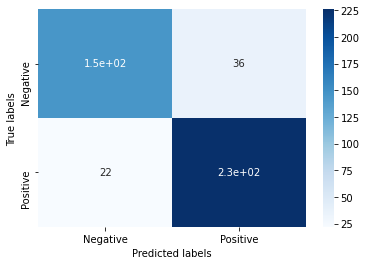

Linear SVM with PCA evaluation metrics for the training set:
AUC is: 0.939
The loss is: 0.526
F1 score is: 86.03%
Accuracy is: 86.51%


In [27]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_pca_svm_lin, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Linear SVM with PCA evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_pca_svm_lin))
print('The loss is: %.3f' % (loss_train_pca_svm_lin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_pca_svm_lin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_pca_svm_lin))) + "%")

# Test set

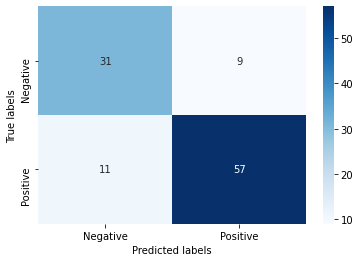

Linear SVM with PCA evaluation metrics for the test set:
AUC is: 0.918
The loss is: 0.574
F1 score is: 80.34%
Accuracy is: 81.48%


In [28]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_pca_svm_lin, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Linear SVM with PCA evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_pca_svm_lin))
print('The loss is: %.3f' % (loss_test_pca_svm_lin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_pca_svm_lin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_pca_svm_lin))) + "%")

# Non-linear model - SVM with PCA:

In [29]:
C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
svm_nonlin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(X_train_pca, y_train)
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

y_pred_train_pca_svm_nonlin = best_svm_nonlin.predict(X_train_pca)
y_pred_proba_train_pca_svm_nonlin = best_svm_nonlin.predict_proba(X_train_pca)
AUC_train_pca_svm_nonlin = roc_auc_score(y_train, y_pred_proba_train_pca_svm_nonlin[:,1])
loss_train_pca_svm_nonlin = hinge_loss(y_train, y_pred_train_pca_svm_nonlin)

y_pred_test_pca_svm_nonlin = best_svm_nonlin.predict(X_test_pca)
y_pred_proba_test_pca_svm_nonlin = best_svm_nonlin.predict_proba(X_test_pca)
AUC_test_pca_svm_nonlin = roc_auc_score(y_test, y_pred_proba_test_pca_svm_nonlin[:,1])
loss_test_pca_svm_nonlin = hinge_loss(y_test, y_pred_test_pca_svm_nonlin)


Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV 1/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.616) f1: (train=0.756, test=0.763) precision: (train=0.608, test=0.616) recall: (train=1.000, test=1.000) roc_auc: (train=0.946, test=0.942) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.616) f1: (train=0.756, test=0.763) precision: (train=0.608, test=0.616) recall: (train=1.000, test=1.000) roc_auc: (train=0.944, test=0.957) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.610, test=0.605) f1: (train=0.758, test=0.754) precision: (train=0.610, test=0.605) recall: (train=1.000, test=1.000) roc_auc: (train=0.942, test=0.972) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.610, test=0.605) f1: (train=0.758, test=0.754)

# Training set:

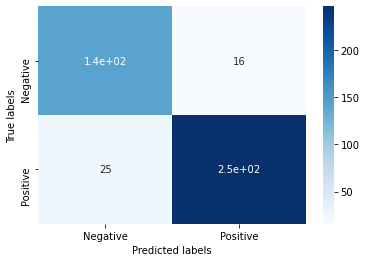

Non-linear SVM with PCA evaluation metrics for the training set:
AUC is: 0.961
The loss is: 0.486
F1 score is: 89.88%
Accuracy is: 90.47%


In [30]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_pca_svm_nonlin, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Non-linear SVM with PCA evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_pca_svm_nonlin))
print('The loss is: %.3f' % (loss_train_pca_svm_nonlin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_pca_svm_nonlin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_pca_svm_nonlin))) + "%")

# Test set:

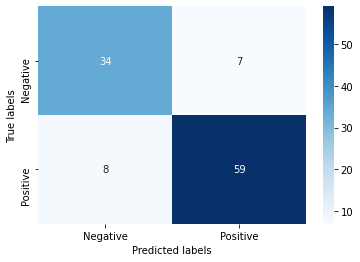

Non-linear SVM with PCA evaluation metrics for the test set:
AUC is: 0.941
The loss is: 0.528
F1 score is: 85.32%
Accuracy is: 86.11%


In [31]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_pca_svm_nonlin, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Non-linear SVM with PCA evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_pca_svm_nonlin))
print('The loss is: %.3f' % (loss_test_pca_svm_nonlin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_pca_svm_nonlin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_pca_svm_nonlin))) + "%")

Now, wew will train the 3 models we used earlier (LR,SVM linear, SVM non-linear) only based on the 2 best features we found earlier ('Increased Urination' and 'Increased Thirst'):

In [32]:
X_train_2fts = X_train[['Increased Urination', 'Increased Thirst']]
X_test_2fts = X_test[['Increased Urination', 'Increased Thirst']]

# Linear model - Logistic Regression 2 best features:

In [33]:
C = 1
penalty = 'l2'
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty=penalty, C=C, max_iter=10000)
logreg.fit(X_train_2fts, y_train)

y_pred_train_2fts_LR = logreg.predict(X_train_2fts)
y_pred_proba_train_2fts_LR = logreg.predict_proba(X_train_2fts)
AUC_train_2fts_LR = roc_auc_score(y_train, y_pred_proba_train_2fts_LR[:,1])
loss_train_2fts_LR = log_loss(y_train, y_pred_train_2fts_LR)

y_pred_test_2fts_LR = logreg.predict(X_test_2fts)
y_pred_proba_test_2fts_LR = logreg.predict_proba(X_test_2fts)
AUC_test_2fts_LR = roc_auc_score(y_test, y_pred_proba_test_2fts_LR[:,1])
loss_test_2fts_LR = log_loss(y_test, y_pred_test_2fts_LR)

# Training set:

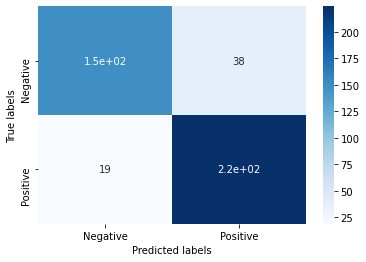

LR 2 best features evaluation metrics for the training set:
AUC is: 0.906
The loss is: 4.578
F1 score is: 86.33%
Accuracy is: 86.74%


In [34]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_2fts_LR, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('LR 2 best features evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_2fts_LR))
print('The loss is: %.3f' % (loss_train_2fts_LR))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_2fts_LR, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_2fts_LR))) + "%")


# Test set:

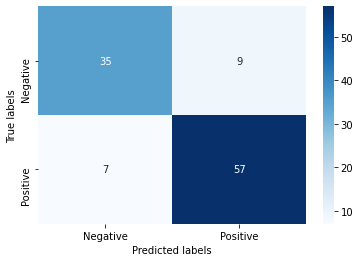

LR 2 best features evaluation metrics for the test set:
AUC is: 0.895
The loss is: 5.117
F1 score is: 84.54%
Accuracy is: 85.19%


In [35]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_2fts_LR, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('LR 2 best features evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_2fts_LR))
print('The loss is: %.3f' % (loss_test_2fts_LR))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_2fts_LR, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_2fts_LR))) + "%")

# Linear model - SVM 2 best features:

In [36]:
svc = SVC(probability=True)
pipe = Pipeline(steps=[('svm', svc)])
C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(X_train_2fts, y_train)
best_svm_lin = svm_lin.best_estimator_
print(svm_lin.best_params_)

y_pred_train_2fts_svm_lin = best_svm_lin.predict(X_train_2fts)
y_pred_proba_train_2fts_svm_lin = best_svm_lin.predict_proba(X_train_2fts)
AUC_train_2fts_svm_lin = roc_auc_score(y_train, y_pred_proba_train_2fts_svm_lin[:,1])
loss_train_2fts_svm_lin = hinge_loss(y_train, y_pred_train_2fts_svm_lin)

y_pred_test_2fts_svm_lin = best_svm_lin.predict(X_test_2fts)
y_pred_proba_test_2fts_svm_lin = best_svm_lin.predict_proba(X_test_2fts)
AUC_test_2fts_svm_lin = roc_auc_score(y_test, y_pred_proba_test_2fts_svm_lin[:,1])
loss_test_2fts_svm_lin = hinge_loss(y_test, y_pred_test_2fts_svm_lin)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.869, test=0.860) f1: (train=0.888, test=0.882) precision: (train=0.923, test=0.918) recall: (train=0.856, test=0.849) roc_auc: (train=0.907, test=0.902) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.858, test=0.907) f1: (train=0.879, test=0.920) precision: (train=0.908, test=0.979) recall: (train=0.852, test=0.868) roc_auc: (train=0.900, test=0.928) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.863, test=0.884) f1: (train=0.884, test=0.900) precision: (train=0.918, test=0.938) recall: (train=0.852, test=0.865) roc_auc: (train=0.903, test=0.918) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.878, test=0.826) f1: (train=0.895, test=0.857) precision: (train=0.942, test=0.849) recall: (train=0.852, test=0.865) roc_auc: (train=0.911, test=0.888) total time

# Training set:

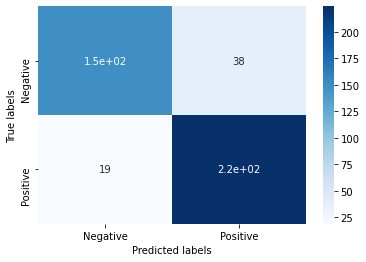

Linear SVM 2 best features evaluation metrics for the training set:
AUC is: 0.906
The loss is: 0.523
F1 score is: 86.33%
Accuracy is: 86.74%


In [37]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_2fts_svm_lin, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Linear SVM 2 best features evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_2fts_svm_lin))
print('The loss is: %.3f' % (loss_train_2fts_svm_lin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_2fts_svm_lin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_2fts_svm_lin))) + "%")

# Test set:

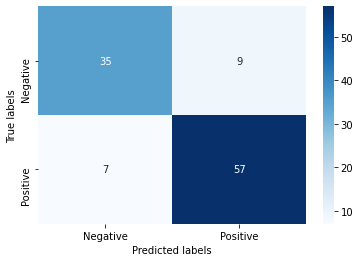

Linear SVM 2 best features evaluation metrics for the test set:
AUC is: 0.895
The loss is: 0.537
F1 score is: 84.54%
Accuracy is: 85.19%


In [38]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_2fts_svm_lin, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Linear SVM 2 best features evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_2fts_svm_lin))
print('The loss is: %.3f' % (loss_test_2fts_svm_lin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_2fts_svm_lin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_2fts_svm_lin))) + "%")

# Non-linear model - SVM 2 best features:

In [39]:
C = [0.01,0.5,1,1.5,2,3,4,5,10,20,50,100,1000]
svm_nonlin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(X_train_2fts, y_train)
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

y_pred_train_2fts_svm_nonlin = best_svm_nonlin.predict(X_train_2fts)
y_pred_proba_train_2fts_svm_nonlin = best_svm_nonlin.predict_proba(X_train_2fts)
AUC_train_2fts_svm_nonlin = roc_auc_score(y_train, y_pred_proba_train_2fts_svm_nonlin[:,1])
loss_train_2fts_svm_nonlin = hinge_loss(y_train, y_pred_train_2fts_svm_nonlin)

y_pred_test_2fts_svm_nonlin = best_svm_nonlin.predict(X_test_2fts)
y_pred_proba_test_2fts_svm_nonlin = best_svm_nonlin.predict_proba(X_test_2fts)
AUC_test_2fts_svm_nonlin = roc_auc_score(y_test, y_pred_proba_test_2fts_svm_nonlin[:,1])
loss_test_2fts_svm_nonlin = hinge_loss(y_test, y_pred_test_2fts_svm_nonlin)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV 1/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.616) f1: (train=0.756, test=0.763) precision: (train=0.608, test=0.616) recall: (train=1.000, test=1.000) roc_auc: (train=0.907, test=0.902) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.608, test=0.616) f1: (train=0.756, test=0.763) precision: (train=0.608, test=0.616) recall: (train=1.000, test=1.000) roc_auc: (train=0.900, test=0.928) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.610, test=0.605) f1: (train=0.758, test=0.754) precision: (train=0.610, test=0.605) recall: (train=1.000, test=1.000) roc_auc: (train=0.903, test=0.918) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.610, test=0.605) f1: (train=0.758, test=0.754)

# Training set:

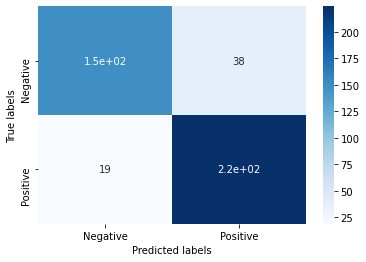

Non-linear SVM 2 best features evaluation metrics for the training set:
AUC is: 0.906
The loss is: 0.523
F1 score is: 86.33%
Accuracy is: 86.74%


In [40]:
cnf_matrix_train = metrics.confusion_matrix(y_pred_train_2fts_svm_nonlin, y_train)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_train,cmap=plt.cm.Blues, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Non-linear SVM 2 best features evaluation metrics for the training set:')
print('AUC is: %.3f' % (AUC_train_2fts_svm_nonlin))
print('The loss is: %.3f' % (loss_train_2fts_svm_nonlin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_2fts_svm_nonlin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_2fts_svm_nonlin))) + "%")

# Test set:

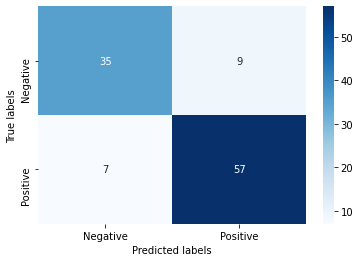

Non-linear SVM 2 best features evaluation metrics for the test set:
AUC is: 0.895
The loss is: 0.537
F1 score is: 84.54%
Accuracy is: 85.19%


In [41]:
cnf_matrix_test = metrics.confusion_matrix(y_pred_test_2fts_svm_nonlin, y_test)
ax1 = plt.subplot()
sns.heatmap(cnf_matrix_test, annot=True,cmap=plt.cm.Blues, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

print('Non-linear SVM 2 best features evaluation metrics for the test set:')
print('AUC is: %.3f' % (AUC_test_2fts_svm_nonlin))
print('The loss is: %.3f' % (loss_test_2fts_svm_nonlin))
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_2fts_svm_nonlin, average='macro'))) + "%")
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_2fts_svm_nonlin))) + "%")

By comparing the evaluation metrics between the 2 feature pca models(dimensionality-reduced) and the 2 best feature models we can see that in general the 2 feature PCA models perform better.